In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = 'repaid'
df = pd.read_csv('./data/german.data', sep=' ',
                     names=features+[target])

In [3]:
#df.loc[df['repaid'] == 2, 'repaid'] = 0

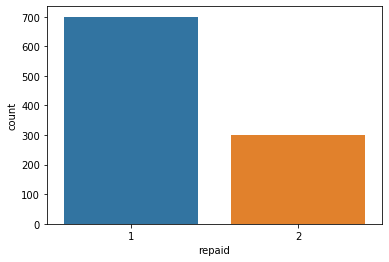

In [4]:
sns.countplot(x = df[target], data = df)

In [5]:
count_no_loan = len(df[df[target]==2])
count_loan = len(df[df[target]==1])
pct_of_no_loan = count_no_loan/(count_no_loan+count_loan)
print("percentage of no subscription is", pct_of_no_loan*100)
pct_of_loan = count_loan/(count_no_loan+count_loan)
print("percentage of subscription", pct_of_loan*100)

percentage of no subscription is 30.0
percentage of subscription 70.0


In [6]:
df.head()

,checking account balance,duration,credit history,purpose,amount,savings,employment,installment,marital status,other debtors,...,property,age,other installments,housing,credits,job,persons,phone,foreign,repaid
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking account balance    1000 non-null object
duration                    1000 non-null int64
credit history              1000 non-null object
purpose                     1000 non-null object
amount                      1000 non-null int64
savings                     1000 non-null object
employment                  1000 non-null object
installment                 1000 non-null int64
marital status              1000 non-null object
other debtors               1000 non-null object
residence time              1000 non-null int64
property                    1000 non-null object
age                         1000 non-null int64
other installments          1000 non-null object
housing                     1000 non-null object
credits                     1000 non-null int64
job                         1000 non-null object
persons                     1000 non-null int64
phone              

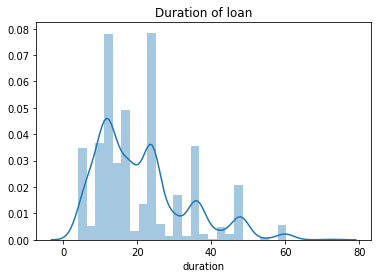

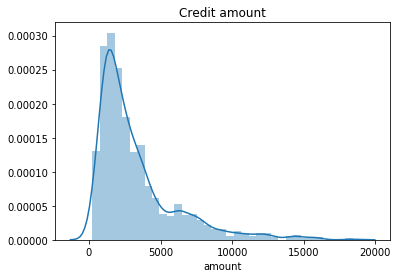

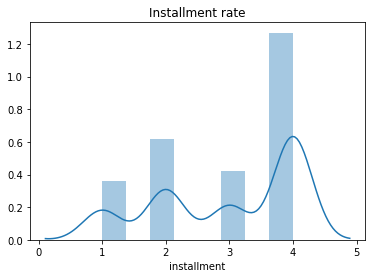

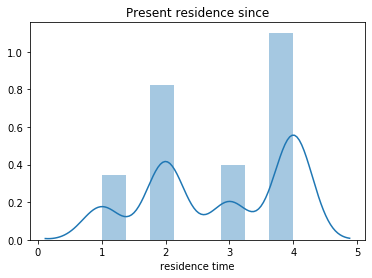

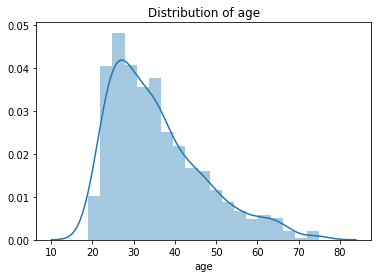

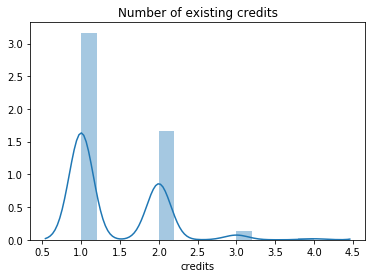

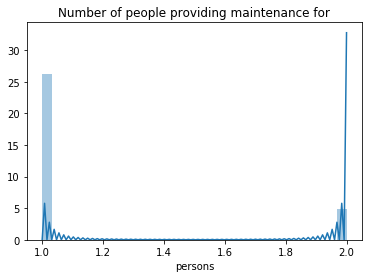

In [8]:
sns.distplot(df["duration"])
plt.title("Duration of loan")
plt.show()

sns.distplot(df["amount"])
plt.title("Credit amount")
plt.show()

sns.distplot(df["installment"])
plt.title("Installment rate")
plt.show()

sns.distplot(df["residence time"])
plt.title("Present residence since")
plt.show()

sns.distplot(df["age"])
plt.title("Distribution of age")
plt.show()

sns.distplot(df["credits"])
plt.title("Number of existing credits")
plt.show()

sns.distplot(df["persons"])
plt.title("Number of people providing maintenance for")
plt.show()



In [9]:
#sns.pairplot(df)

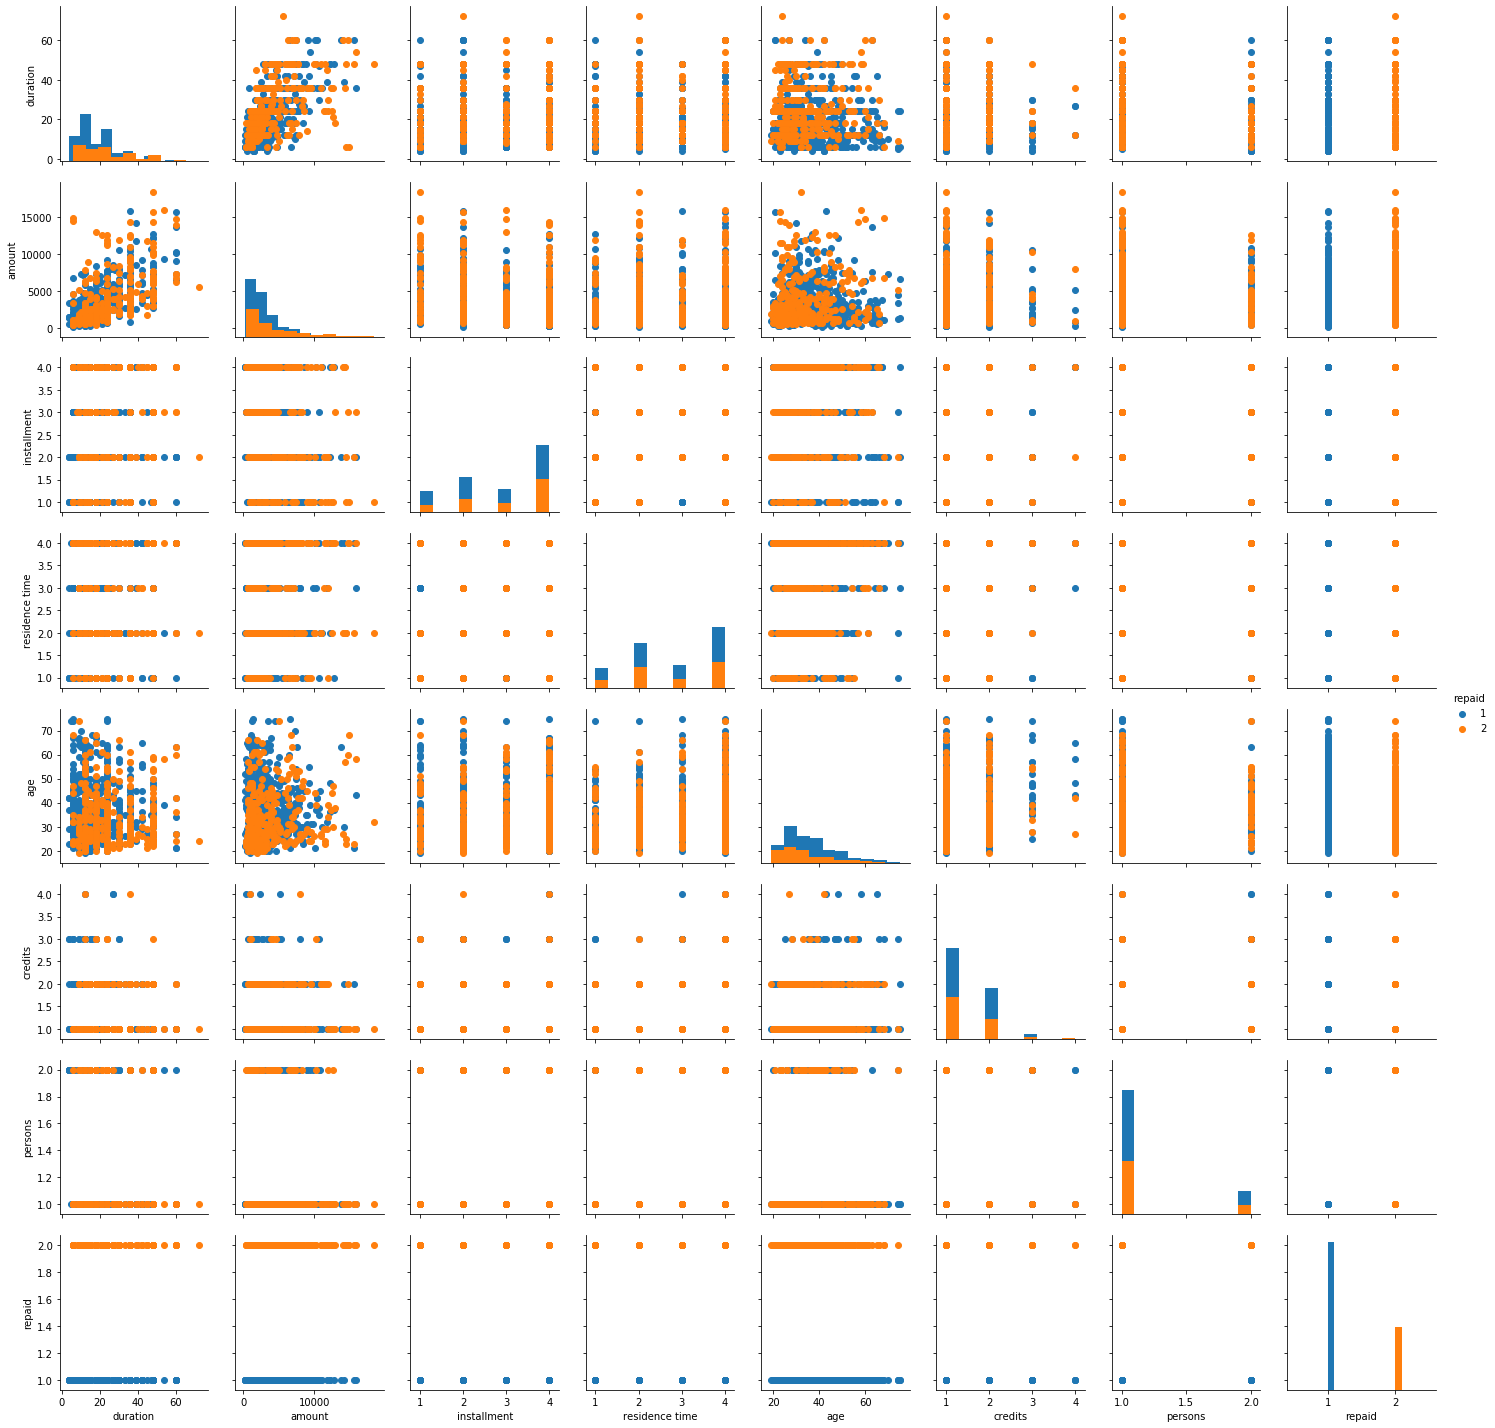

In [10]:
g = sns.PairGrid(df, hue="repaid")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [11]:
numerical_features = ['duration', 'age', 'residence time', 'installment', 'amount', 'duration', 'persons', 'credits']
quantitative_features = list(filter(lambda x: x not in numerical_features, features))
X = pd.get_dummies(df, columns=quantitative_features, drop_first=True)
encoded_features = list(filter(lambda x: x != target, X.columns))

In [12]:
X.head()

,duration,amount,installment,residence time,age,credits,persons,repaid,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0


In [13]:
# scale data
norm = 1/X.std()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# split in training and test data for normalized data
Xtrain, Xtest, Xtrain_normal, Xtest_normal, ytrain, ytest = train_test_split(X*norm, X, df[target],
            test_size=0.2)

# The kNN model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [17]:
k_range = range(1,100)
scores = {}
scores_list = []
for k in k_range:
    model1 = KNeighborsClassifier(n_neighbors=k)
    model1.fit(Xtrain, ytrain)
    ypred1 = model1.predict(Xtest)
    scores[k] = metrics.accuracy_score(ytest, ypred1)
    scores_list.append(metrics.accuracy_score(ytest, ypred1))

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy score')

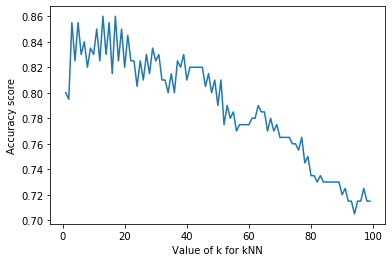

In [19]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy score')

In [20]:
type(scores)

dict

In [21]:
def keywithmaxval(d):
     """ a) create a list of the dict's keys and values; 
         b) return the key with the max value"""  
     v=list(d.values())
     k=list(d.keys())
     return k[v.index(max(v))]

In [22]:
kbest = keywithmaxval(scores)
print(kbest)

13


In [35]:
model = KNeighborsClassifier(n_neighbors = kbest).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(ypred)
print("Accuracy:", metrics.accuracy_score(ytest, ypred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1
 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1
 1 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2]
Accuracy: 0.86


Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 0 entries were predicted as class 1.

Confusion matrix:
 [[129   2]
 [ 26  43]]


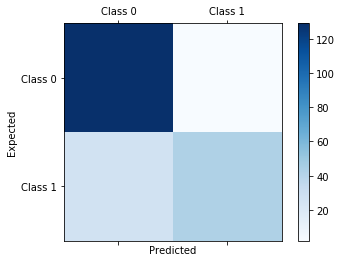

In [26]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=ytest, y_pred=ypred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [27]:
predicted_prob = model.predict_proba(Xtest)[:, 0] #probability of belonging to class 1


[0.69230769 0.69230769 0.61538462 0.61538462 0.61538462 0.76923077
 0.61538462 0.92307692 0.84615385 0.61538462 0.69230769 0.84615385
 0.84615385 1.         0.69230769 1.         0.38461538 0.38461538
 0.92307692 0.61538462 0.92307692 0.53846154 0.76923077 0.84615385
 0.92307692 0.69230769 0.84615385 0.69230769 1.         0.76923077
 0.76923077 0.61538462 1.         1.         0.92307692 0.76923077
 1.         0.76923077 0.92307692 0.23076923 1.         0.38461538
 0.53846154 0.61538462 0.76923077 0.92307692 0.84615385 0.76923077
 1.         0.69230769 0.92307692 0.23076923 0.23076923 1.
 1.         0.76923077 1.         0.61538462 0.46153846 0.46153846
 0.69230769 0.30769231 0.53846154 0.61538462 1.         0.92307692
 0.84615385 0.23076923 0.38461538 0.53846154 0.92307692 0.92307692
 0.07692308 0.53846154 0.76923077 0.69230769 0.92307692 0.92307692
 0.84615385 0.76923077 1.         0.76923077 0.92307692 0.92307692
 1.         0.92307692 1.         1.         1.         0.46153846
 0.

In [38]:
interest_rate = 0.005
gain = Xtest_normal['amount']*((1 + interest_rate)**(Xtest_normal['duration']) - 1)
expected_utility = ((gain*predicted_prob)-(Xtest_normal['amount']*(1-predicted_prob))).astype(int)
expected_utility[expected_utility > 0] = 1
expected_utility[expected_utility < 0] = 2
actions = expected_utility

In [39]:
n_test_examples = len(Xtest)
utility = 0
    
for t in range(n_test_examples):
        action = actions.iloc[t]
        good_loan = ytest.iloc[t] # assume the labels are correct
        duration = Xtest_normal['duration'].iloc[t]
        amount = Xtest_normal['amount'].iloc[t]
        # If we don't grant the loan then nothing happens
        if (action==1):
            if (good_loan != 1):
                utility -= amount
            else:    
                utility += amount*(pow(1 + interest_rate, duration) - 1)
                
utility

13287.191866628158